Test out the new astrometry metrics

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
from mafContrib import ParallaxCoverageMetric, ParallaxHADegenMetric

In [6]:
# Set up the database connection
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'astrometry2'
resultsDb = db.ResultsDb(outDir=outDir)

In [7]:
bundleList = []
sqls = ['night < 600', 'night < 1200', '']
slicer = slicers.HealpixSlicer(nside=16)
for sql in sqls:
    metric = ParallaxCoverageMetric()
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
    metric = ParallaxHADegenMetric()
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


Querying database with no constraint.
Found 2469307 visits
Running:  ['opsim_ParallaxCoverageMetric_HEAL', 'opsim_ParallaxHADegenMetric_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint night < 1200
Found 818915 visits
Running:  ['opsim_ParallaxCoverageMetric_night_lt_1200_HEAL', 'opsim_ParallaxHADegenMetric_night_lt_1200_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint night < 600
Found 435218 visits
Running:  ['opsim_ParallaxHADegenMetric_night_lt_600_HEAL', 'opsim_ParallaxCoverageMetric_night_lt_600_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
monopole: 0.474012  dipole: lon: 116.935, lat: -6.40847, amp: 0.0579271
monopole: 0.0229442  dipole: lon: 70.5829, lat: 30.2541, amp: 0.21103
Plotting complete.
Plotting figures with n

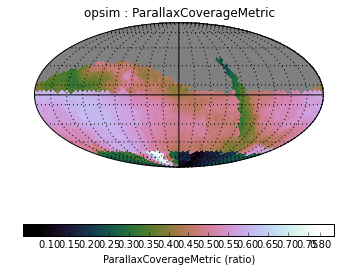

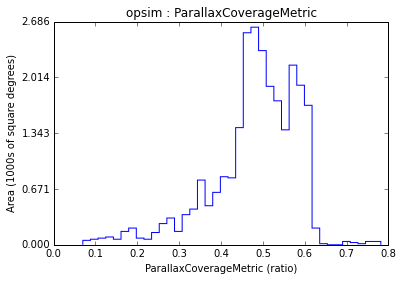

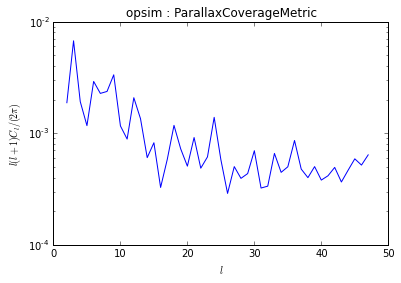

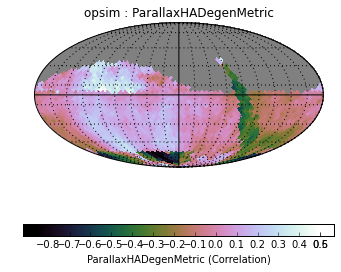

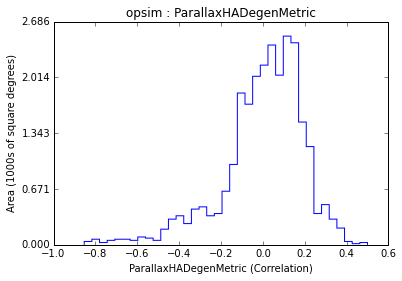

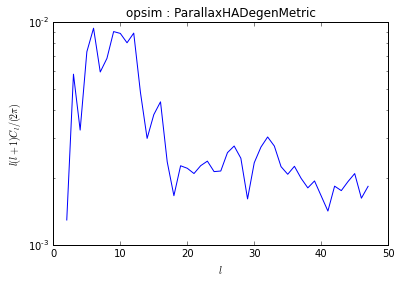

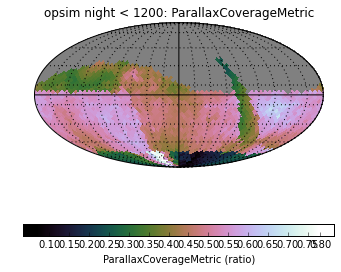

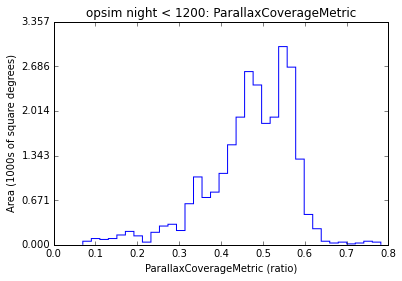

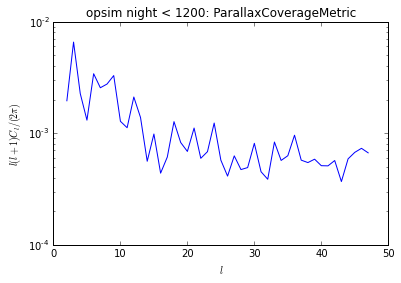

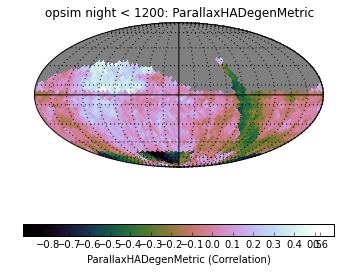

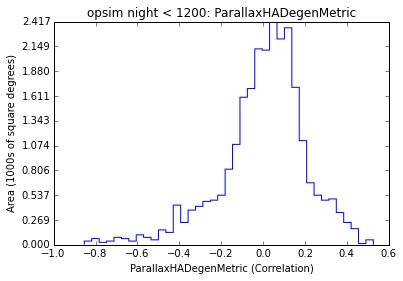

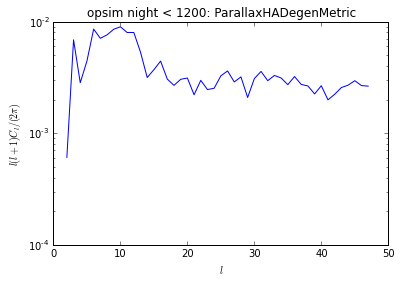

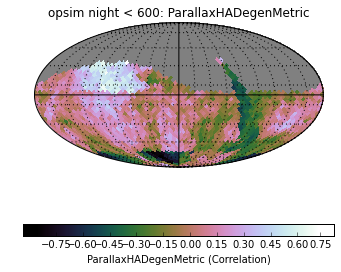

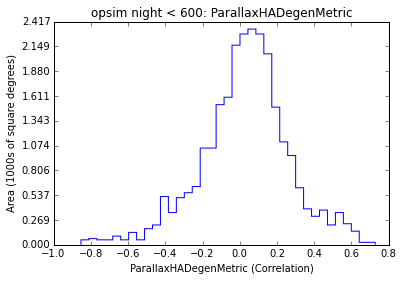

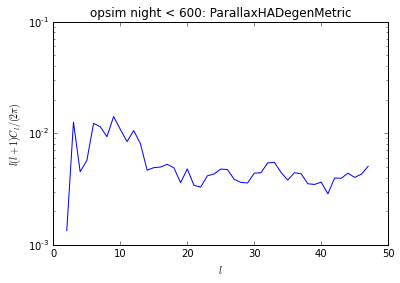

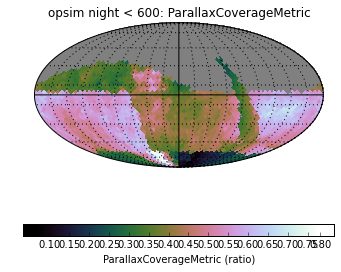

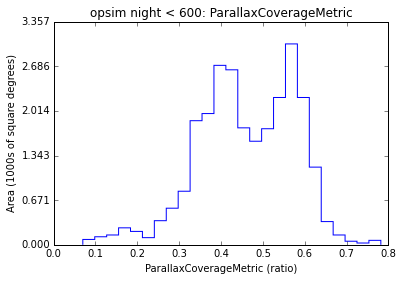

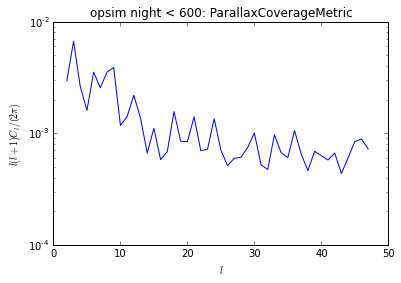

In [8]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)